In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\gnwao\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\gnwao\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\gnwao\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv("hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Checking for Missing Values

In [3]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Sanity Checks

In [4]:
(df['registered'] + df['casual'] != df['cnt']).sum()

0

In [5]:
df = df.rename(mapper = {'mnth': 'month', 'hr':'hour', 'yr': 'year'}, axis = 1)
df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [7]:
df['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

### Dropping Some Columns

In [8]:
col_to_drop = ['casual', 'registered','instant', 'dteday']

In [9]:
df_model = df.drop(col_to_drop, axis = 1).copy()
df_model

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


### Univariate Analysis

In [10]:
df_model.describe()

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


## Plots

#### Density plot of the temp

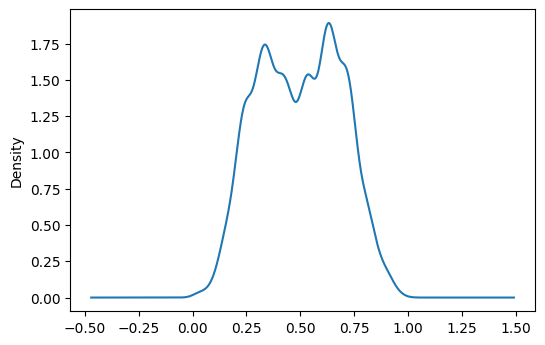

In [11]:
plt.figure(dpi = 100)
df_model['temp'].plot(kind = 'density')

plt.show()

#### Box plot of the atemp

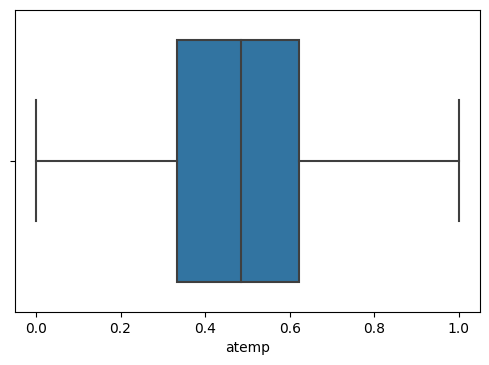

In [12]:
plt.figure(dpi = 100)
sns.boxplot(x = df_model['atemp'])

plt.show()

#### Histplot of the 'hum'

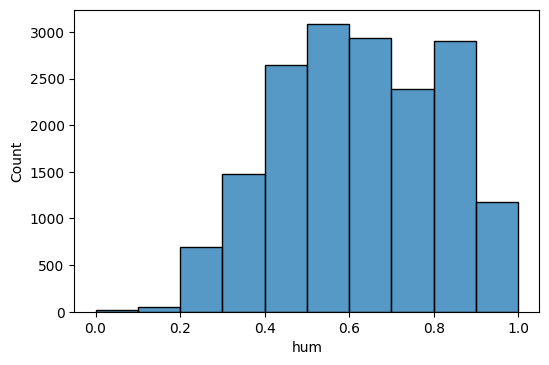

In [13]:
plt.figure(dpi = 100)
sns.histplot(df_model['hum'], bins = 10)

plt.show()

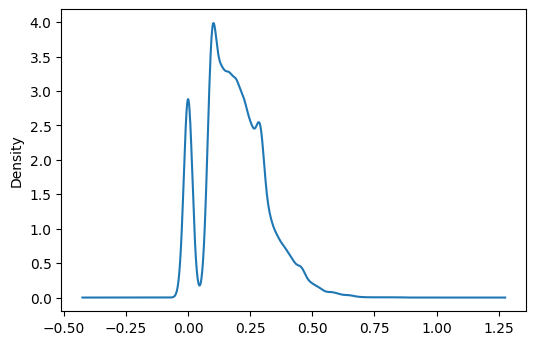

In [14]:
plt.figure(dpi = 100)
df_model['windspeed'].plot(kind = 'density')

plt.show()

#### Density and Box plot for CNT

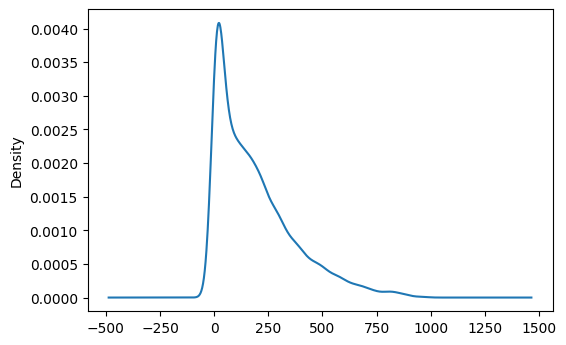

In [15]:
plt.figure(dpi = 100)
df_model['cnt'].plot(kind = 'density')

plt.show()

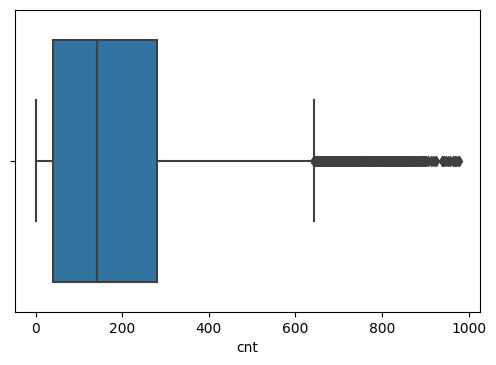

In [16]:
plt.figure(dpi = 100)
sns.boxplot(x = df_model['cnt'])

plt.show()

There seem to be present some outliers (high values) in the cnt 

### Handling the Outliers

In [17]:
df_model['cnt'].quantile([0.1, 0.25, 0.50, 0.75, 0.9, 0.95, 0.99])

0.10      9.00
0.25     40.00
0.50    142.00
0.75    281.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

In [18]:
df_model_2 = df_model[df_model['cnt'] < 563].copy()
df_model_2.head()

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


## Bivariate Analysis

#### Box plot of 'cnt' Vs 'hour

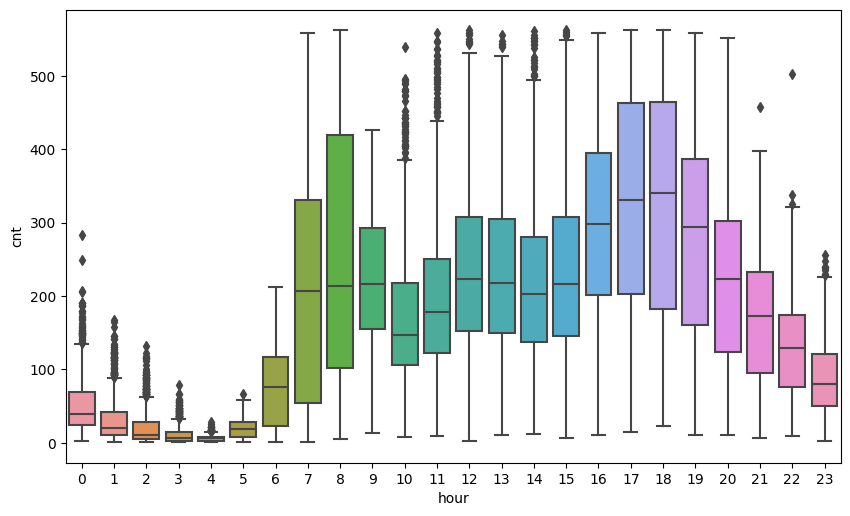

In [19]:
plt.figure(figsize = (10,6), dpi = 100)
sns.boxplot(x = df_model_2['hour'], y = df_model_2['cnt'])

plt.show()

#### Box plot of 'cnt' Vs 'Weekday

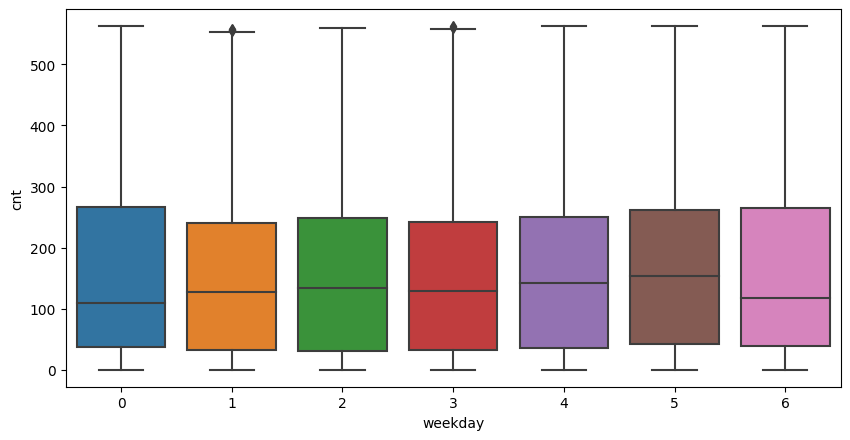

In [20]:
plt.figure(figsize = (10,5), dpi = 100)
sns.boxplot(x = df_model_2['weekday'], y = df_model_2['cnt'])

plt.show()

#### Box plot of 'cnt' Vs 'month'

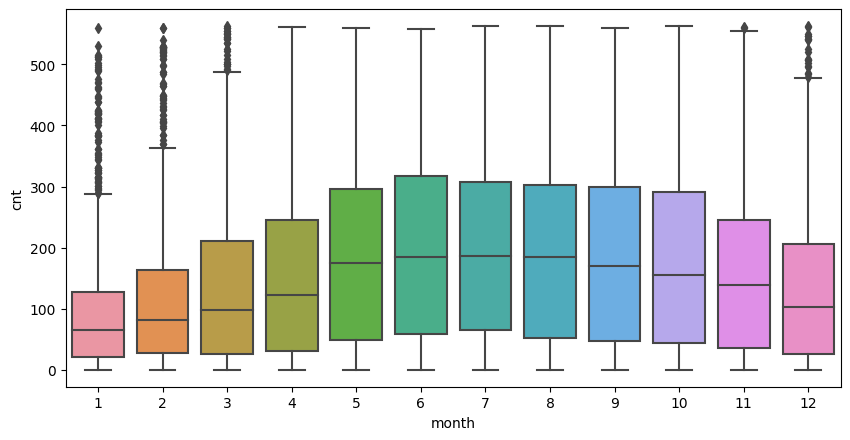

In [21]:
plt.figure(figsize = (10,5), dpi = 100)
sns.boxplot(x = df_model_2['month'], y = df_model_2['cnt'])

plt.show()

#### Bos plot for 'cnt' Vs 'season

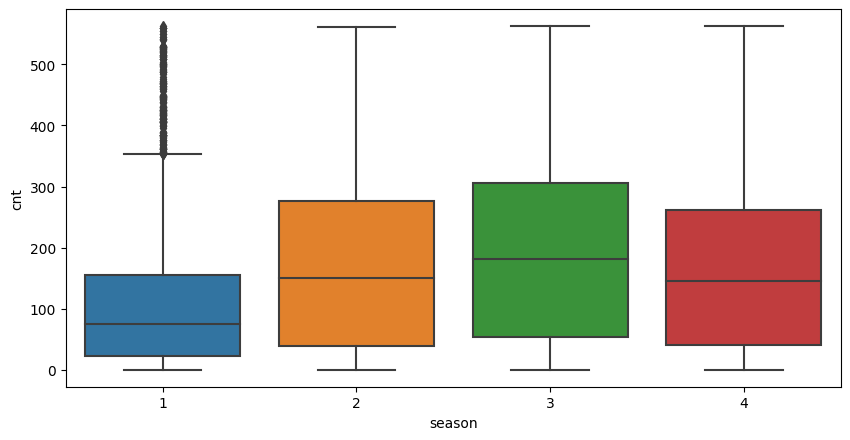

In [22]:
plt.figure(figsize = (10,5), dpi = 100)
sns.boxplot(x = df_model_2['season'], y = df_model_2['cnt'])

plt.show()

In [23]:
examine = df_model_2[['cnt', 'hour']].copy()
examine

,cnt,hour
0,16,0
1,40,1
2,32,2
3,13,3
4,1,4
...,...,...
17374,119,19
17375,89,20
17376,90,21
17377,61,22


In [24]:
examine[examine['hour'] == 0].median()

cnt     40.0
hour     0.0
dtype: float64

In [54]:
#plt.figure(figsize = (10,5), dpi = 100)
for_plotting = examine.groupby('hour').agg('median')

#plt.show()

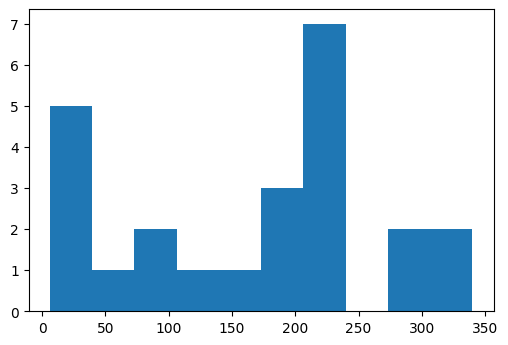

In [62]:
plt.figure(dpi = 100)
plt.hist(for_plotting)#, bins = 50)

plt.show()

#### Correlation of some Variables

In [25]:
variables = ['temp', 'atemp', 'hum', 'windspeed']

In [26]:
corr = df_model_2[variables].corr()
corr

,temp,atemp,hum,windspeed
temp,1.000000,0.988218,-0.042603,-0.033209
atemp,0.988218,1.000000,-0.025747,-0.073985
hum,-0.042603,-0.025747,1.000000,-0.288648
windspeed,-0.033209,-0.073985,-0.288648,1.000000


#### Heatmap of the Correlation

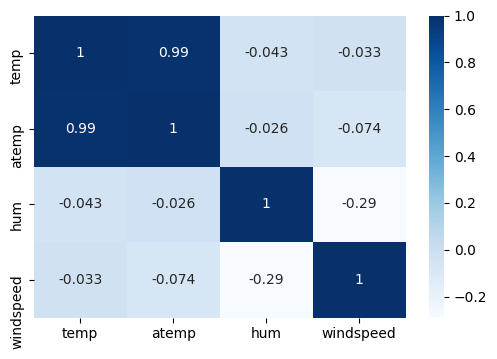

In [27]:
plt.figure(dpi = 100)
sns.heatmap(corr, annot = True, cmap = 'Blues')

plt.show()

## Data Preprocessing

In [28]:
df_model_3 = df_model_2.copy()
df_model_3.head()

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [29]:
df_model_3.month[df_model_3.month.isin([5,6,7,8,9])] = 5

In [30]:
df_model_3[df_model_3['hour'] == 11]

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
11,1,0,1,11,0,6,0,1,0.36,0.3333,0.81,0.2836,56
34,1,0,1,11,0,0,0,2,0.36,0.3333,0.71,0.2537,70
56,1,0,1,11,0,1,1,1,0.20,0.1818,0.40,0.3284,51
79,1,0,1,11,0,2,1,1,0.22,0.2121,0.51,0.2985,57
102,1,0,1,11,0,3,1,1,0.26,0.2273,0.33,0.3284,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17270,1,1,12,11,0,4,1,2,0.28,0.2424,0.56,0.4478,103
17294,1,1,12,11,0,5,1,2,0.28,0.2727,0.52,0.2239,178
17318,1,1,12,11,0,6,0,3,0.20,0.2424,0.93,0.0896,45
17342,1,1,12,11,0,0,0,1,0.26,0.2273,0.41,0.4179,136


In [31]:
df_model_3['month'].unique()

array([ 1,  2,  3,  4,  5, 10, 11, 12], dtype=int64)

In [32]:
df_model_3['hour'][df_model_3['hour'].isin([0,1,2,3,4,5])] = 0
df_model_3['hour'][df_model_3['hour'].isin([11,12,13,14,15])] = 11

In [33]:
df_model_3['hour'].unique()

array([ 0,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype=int64)

## Model Building

In [34]:
df_model_3.columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [35]:
cat_cols = ['season', 'weathersit', 'weekday', 'month', 'hour']
df_model_3 = pd.get_dummies(df_model_3, columns = cat_cols, drop_first = True)

In [36]:
df_model_3.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_10', 'month_11', 'month_12', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

### Model Creation

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [38]:
X = df_model_3.drop('cnt', axis = 1)
y = df_model_3['cnt']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=100)

In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_train_pred = model.predict(X_train)

##### Reporting the r2 of the Model

In [43]:
r2_score(y_train, y_train_pred)

0.6766333945565888

#### Making Prediction

In [44]:
y_test_pred = model.predict(X_test)

##### Reporting the r2 of the Prediction

In [45]:
r2_score(y_test, y_test_pred)

0.6628848203006419